In [35]:
import numpy as np
import pandas as pd

In [36]:
train_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/train_preprocessed.csv")
val_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/validation_preprocessed.csv")
test_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/test_preprocessed.csv")

In [37]:
pd.set_option('display.max_colwidth', None)

In [38]:
train_data.drop_duplicates(inplace=True, ignore_index=True)
val_data.drop_duplicates(inplace=True, ignore_index=True)
test_data.drop_duplicates(inplace=True, ignore_index=True)

In [39]:
train_data

,headline,categories
0,حكم ضد وزاره اعماره بتعويض قدره 13 مليار لشركه,"('جورنالات بلادي',)"
1,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش صور,"('كود سبور',)"
2,الاسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)"
3,تحليل هذه ابرز النقط الضائعه في قضيه القتل بمراكش والتي تجعل الجريمه غامضه لحدود الساعه,"('آراء',)"
4,جورنالات بلادي1 اموال المبادره توجه لاحداث مقاه ومحلبات ومطالب بفتح تحقيق ودوزيم مهدده بالافلاس والدوله تتدخل لانقاذها,"('جورنالات بلادي',)"
...,...,...
35939,الكبير لن يستطيع تلبيه دعوه غيريتس للمنتخب,"('آش واقع',)"
35940,سلمي رشيد ضيفه خيمه رمضان بدبي,"('ميديا وثقافة',)"
35941,الفنانه المغربيه ابتسام تسكت مطلوبه بوجده,"('الزين والحداكة',)"
35942,من بعد 15 العام تصوير تتمه فيلم ماروك لي كان نوض روينه,"('ميديا وثقافة',)"


<AxesSubplot:xlabel='categories'>

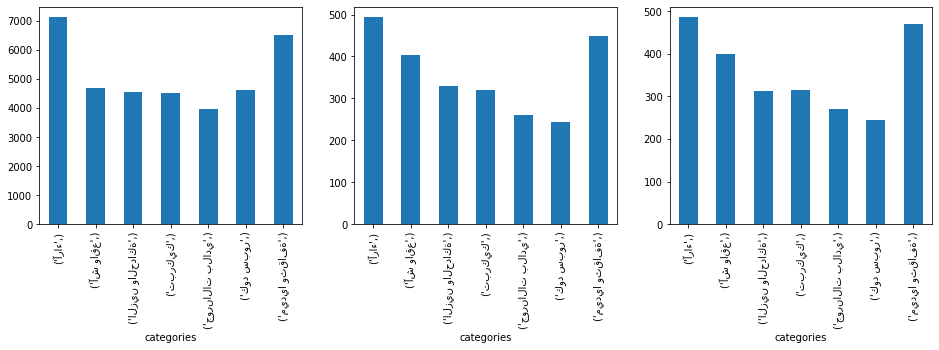

In [40]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [41]:
from sklearn.utils import resample

def downsample(data, column, n_samples):

  column_df = data[data["categories"] == column]

  data.drop(data[data["categories"] == column].index, inplace=True)

  column_downsampled = resample(column_df, replace=True, n_samples=n_samples, random_state=42)

  data = pd.concat([column_downsampled, data], ignore_index=True).sort_index()

  return data

In [42]:
for categ in train_data["categories"].unique():
  train_data = downsample(train_data, categ, 4000)

In [43]:
for categ in val_data["categories"].unique():
  val_data = downsample(val_data, categ, 500)

In [44]:
for categ in test_data["categories"].unique():
  test_data = downsample(test_data, categ, 500)

<AxesSubplot:xlabel='categories'>

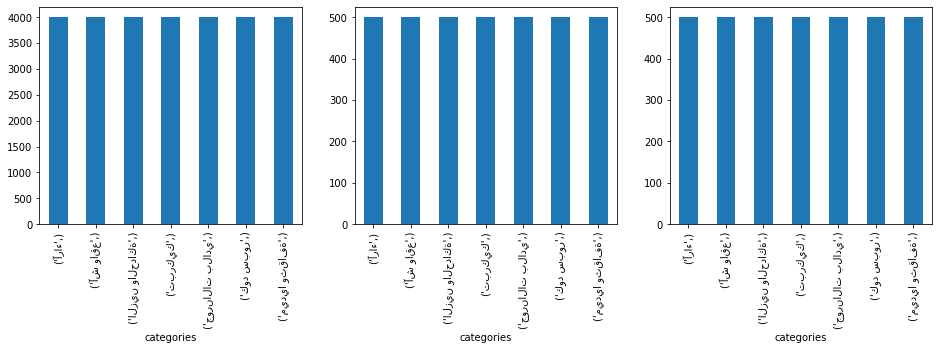

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [46]:
def categ2label(categ):
  labels_dict = {
      "('جورنالات بلادي',)" : 0,
      "('كود سبور',)" : 1,
      "('تبركيك',)" : 2,
      "('آراء',)" : 3,
      "('آش واقع',)" : 4,
      "('ميديا وثقافة',)" : 5,
      "('الزين والحداكة',)" : 6,
  }
  return labels_dict[categ]

In [47]:
train_data["label"] = train_data["categories"].apply(categ2label)
val_data["label"] = val_data["categories"].apply(categ2label)
test_data["label"] = test_data["categories"].apply(categ2label)

In [48]:
train_data = train_data.sample(frac=1).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [49]:
train_data

,headline,categories,label
0,ايمن السرحاني مول الفيديوهات ب 0 درهم كيوجد الجديد بسيلفي,"('ميديا وثقافة',)",5
1,نقابه الاسلاميين تحذر من توظيف ما يقع بمصر والعوده الي ماضي التحكم,"('آش واقع',)",4
2,الخزيرات صبليوني و 6 مغاربه نصبو علي مؤسسات حكوميه باش يقادو الوراق للحراگه,"('تبركيك',)",2
3,ڤوط حكيمي ضمن افضل 5 لعابا ف افريقيا,"('كود سبور',)",1
4,كبش الضحيه بين النظام السياسي والمعارضه ديالو تذكير بالايام للي كانت فيها المحاكمات مجرد اخراج مسرحي ديال بالصح اما دابا غير كولوها باارده وقولو للي بغيتو,"('آراء',)",3
...,...,...,...
27995,تطورات جديده علي الاغنيه ديال روبي اللي تحيدات من يوتوب,"('ميديا وثقافة',)",5
27996,ميزانيه المينورسو علي طاوله الجمعيه العامه للامم المتحده,"('آش واقع',)",4
27997,من الشوفه اللوله طاح فالشبكه حكايه شاب مغربي يبحث عن فتاه عبر منشورات ورقيه والفايسبوك وفيديوهات تعريفيه تجتاح الفايسبوك فيديو,"('تبركيك',)",2
27998,فاس تبحث عن صوره لنفسها في المراه من خلال الدوره 21 لمهرجان الموسيقي العالميه العريقه,"('ميديا وثقافة',)",5


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features_train = tfidf.fit_transform(train_data['headline']).toarray()
labels_train = train_data["label"]
features_train.shape

(28000, 249579)

In [51]:
# for incremental learning

features_train = features_train.reshape(-1,800,249579)

labels_train = labels_train.values.reshape(-1,800)

features_train.shape, labels_train.shape
# labels_train, labels_val, labels_test = labels_train.reshape(-1,800), labels_val.reshape() labels_test.reshape(-1,800)

((35, 800, 249579), (35, 800))

<AxesSubplot:>

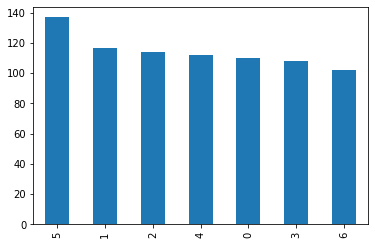

In [52]:
pd.Series(labels_train[0]).value_counts().plot.bar()

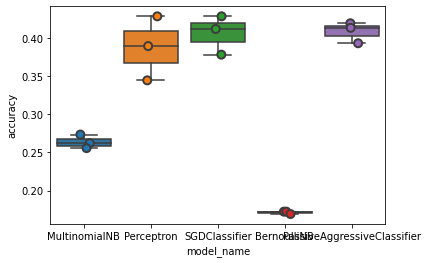

In [53]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier, SGDClassifier
from sklearn.model_selection import cross_val_score
models = [
    MultinomialNB(),
    Perceptron(),
    SGDClassifier(),
    BernoulliNB(),
    PassiveAggressiveClassifier()
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_train[0], labels_train[0], scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [54]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
PassiveAggressiveClassifier    0.408756
SGDClassifier                  0.406278
Perceptron                     0.387551
MultinomialNB                  0.263740
BernoulliNB                    0.171247
Name: accuracy, dtype: float64

In [55]:
from sklearn.naive_bayes import MultinomialNB

M_NB_model = MultinomialNB()
for i in range(1, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    M_NB_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [56]:
from sklearn.metrics import classification_report

y_pred = M_NB_model.predict(features_train[0])
print(classification_report(labels_train[0], y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       110
           1       0.93      0.97      0.95       117
           2       0.75      0.67      0.71       114
           3       0.79      0.88      0.83       108
           4       0.80      0.75      0.77       112
           5       0.86      0.79      0.82       137
           6       0.78      0.85      0.82       102

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



<AxesSubplot:>

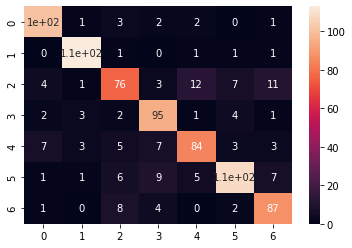

In [57]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_train[0], y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier

PAC_model = PassiveAggressiveClassifier()
for i in range(1, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    PAC_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [59]:
from sklearn.metrics import classification_report

y_pred = PAC_model.predict(features_train[0])
print(classification_report(labels_train[0], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       110
           1       0.82      0.95      0.88       117
           2       0.87      0.59      0.70       114
           3       0.80      0.78      0.79       108
           4       0.65      0.83      0.73       112
           5       0.98      0.61      0.75       137
           6       0.57      0.92      0.70       102

    accuracy                           0.77       800
   macro avg       0.81      0.78      0.77       800
weighted avg       0.82      0.77      0.77       800



<AxesSubplot:>

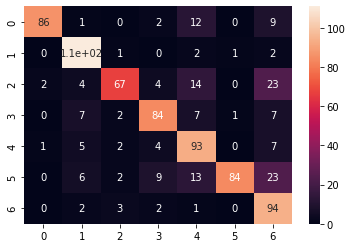

In [60]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_train[0], y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [61]:
from sklearn.linear_model import Perceptron

Per_model = Perceptron()
for i in range(1, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    Per_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [62]:
from sklearn.metrics import classification_report

y_pred = Per_model.predict(features_train[0])
print(classification_report(labels_train[0], y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       110
           1       0.99      0.76      0.86       117
           2       0.94      0.43      0.59       114
           3       0.88      0.55      0.67       108
           4       0.98      0.51      0.67       112
           5       0.35      0.98      0.52       137
           6       0.96      0.67      0.79       102

    accuracy                           0.67       800
   macro avg       0.87      0.66      0.71       800
weighted avg       0.85      0.67      0.70       800



<AxesSubplot:>

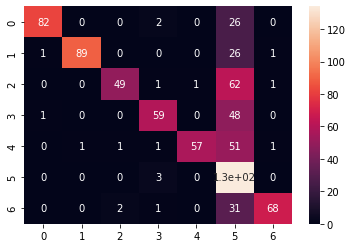

In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_train[0], y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [64]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# SVC_model = SVC()

# grid_param = {
#     'C': [0.1,10,10],
#     'kernel': ['linear','poly','rbf','sigmoid'],
#     'gamma': ['scale', 'auto'],
# }
# gd_sr = GridSearchCV(estimator=SVC_model, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
# gd_sr.fit(features,labels)
# best_parameters = gd_sr.best_params_
# print(best_parameters)
# best_score = gd_sr.best_score_
# print(best_score)

In [65]:
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import cross_val_score

# model = LinearSVC()
# entries = []
# model_name = model.__class__.__name__
# accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=3)
# for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])